# 1 Identifying the trending restaurants with your own scoring algorithm
    Assumption: The meaning of Popular to me means having the most votes(70%) while having the highest rates(30%). I decide to not use reviews as one of the metrics because reviews tend to show people's opinions, either like or dislike. We cannot identify people's preferences by only looking at the quantified reviews, which is number. So votes and ratings are more representative compare to the reviews in the dataset. 

    I also choose the top 1% to be the trending restaurants

In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv('2020-XTern-DS.csv')


In [19]:
df_new = df.copy()

In [20]:
df_new['Votes'] = df_new['Votes'].replace("-", 0)
df_new['Rating'] = df_new['Rating'].replace("-", 0)
df_new['Rating'] = df_new['Rating'].replace("NEW", -1) #new restaurants as -1
df_new['Rating'] = df_new['Rating'].replace("Opening Soon", -2) #not open yet as -2
df_new['Average_Cost'] = df_new['Average_Cost'].str.replace('$', '')
df_new['Average_Cost'] = df_new['Average_Cost'].str.replace(',', '').astype(float)
df_new['Average_Cost'] = df_new['Average_Cost'].astype(float)
df_new['Minimum_Order'] = df_new['Minimum_Order'].str.replace('$', '')
df_new['Minimum_Order'] = df_new['Minimum_Order'].astype(float)
df_new['Cook_Time'] = df_new['Cook_Time'].str.replace(' minutes', '')
df_new['Cook_Time'] = df_new['Cook_Time'].astype(float)
df_new['Reviews'] = df_new['Reviews'].replace("-", 0)
df_new['Reviews'] = df_new['Reviews'].astype(int)
df_new['Restaurant'] = df_new['Restaurant'].astype('string')
df_new = df_new.astype({'Rating':'float', 'Votes':"int", "Cuisines":"category"})


In [21]:
#Top 1% trending restaurants with new ranking metrics, 70% of votes rank and 30% of rating rank. 
rank_votes = df_new['Votes'].rank(method = 'average', ascending = False).astype(float)
rank_rating= df_new['Rating'].rank(method = 'average', ascending = False).astype(float)
df_new['ranking'] = (rank_votes * 0.7+ rank_rating * 0.3).rank(method='dense').astype(int)
popular = df_new.sort_values(by = ['ranking'], ascending = True).head(20)
popular

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,ranking
1180,ID_1064,39.587777,-85.564805,"Continental, North Indian, BBQ, Steak",80.0,50.0,4.7,9054,6504,45.0,1
1300,ID_1666,39.959980,-85.903329,"Mexican, American, Italian, Burger",50.0,99.0,4.6,4903,3989,65.0,2
1428,ID_2051,39.759886,-85.500507,"Italian, Continental, Chinese, Mexican, Fast F...",30.0,50.0,4.7,3975,2359,65.0,3
759,ID_6915,39.303801,-85.960137,"European, Italian, American, Salad",65.0,50.0,4.6,2858,1673,30.0,4
973,ID_2421,39.351230,-85.012645,"Continental, North Indian, Mughlai, Italian, A...",80.0,50.0,4.5,2831,1415,30.0,5
213,ID_7158,39.200086,-85.576006,"Ice Cream, Cafe, Pizza, Burger, Beverages",20.0,50.0,4.5,2805,1457,45.0,6
197,ID_2041,39.169006,-85.230237,"Italian, Pizza, Salad, Healthy Food, Mexican, ...",65.0,50.0,4.4,3248,1603,45.0,7
123,ID_2885,39.543546,-85.186797,"German, Italian, Cafe",45.0,50.0,4.3,4691,2547,45.0,8
335,ID_1947,39.092982,-85.673167,"Bar Food, North Indian, Italian, Continental",55.0,50.0,4.3,3394,1845,30.0,9
80,ID_7753,39.571114,-85.069320,"European, Continental, North Indian, Desserts",75.0,50.0,4.3,3124,1660,45.0,10


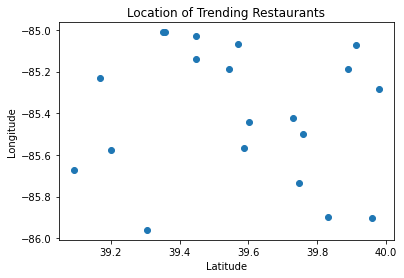

In [22]:
plt.scatter(x="Latitude", y="Longitude", data=popular)
plt.title('Location of Trending Restaurants')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

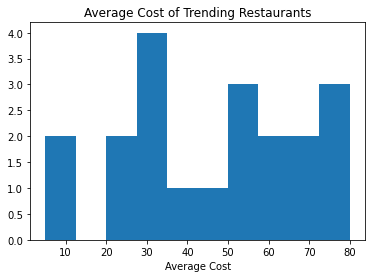

In [25]:
plt.hist('Average_Cost', data = popular)
plt.title('Average Cost of Trending Restaurants')
plt.xlabel('Average Cost')
plt.show()

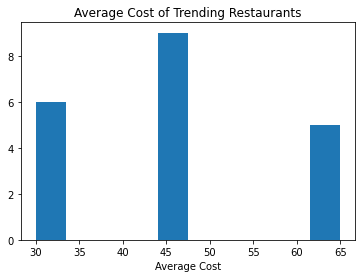

In [26]:
plt.hist('Cook_Time', data = popular)
plt.title('Cook Time of Trending Restaurants')
plt.xlabel('Cook Time')
plt.show()

### Conclusions on Trending Restaurants
1. I take 30% of the Rating rank and 70% of the Votes rank to get the new ranking metric. Above DataFrame is the top 1% of the restaurants among all restaurants. They have the highest votes and the best ratings. 
2. Cafe and Dessert type of restaurant occupies a big proportion among the top 1% restaurants, there are 9 out of 20 restaurants are selling drinks, coffee, and dessert. Asian food, such as Chinese, North Indian is also popular among the top 1% of restaurants. 
3. Based on the "Location of Trending Restaurants" plot above, the top 1% trending restaurants' locations are pretty scatter but fewer of them are on the left side of the graph above. 
4. Based on the "Average Cost of Trending Restaurants" plot above, the top 1% of trending restaurants have an average cost of 30 dollars, 50 dollars, and 80 dollars. 
5. The cook time of trending restaurants are mostly around 45 minutes. 

# 2 Clustering restaurant locations to figure out the optimized FoodieX pick up zones

In [27]:
from sklearn.cluster import KMeans

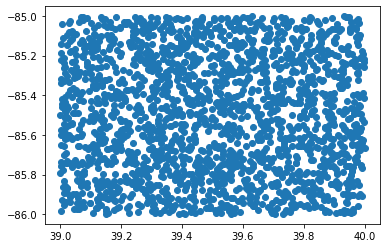

In [28]:
plt.scatter(x="Latitude", y="Longitude", data=df_new) #can't really identify how many clusters do we need

Text(0, 0.5, 'Error Loss')

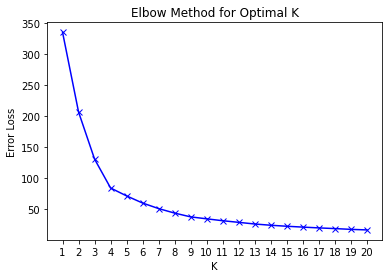

In [29]:
#identifying number of clusters
locations = df_new[["Latitude","Longitude"]].to_numpy()
error_loss =[] 
for i in range(1, 21): 
    kmeans = KMeans(n_clusters = i, max_iter = 500) 
    kmeans.fit(locations) 
    error_loss.append(kmeans.inertia_) 
    
plt.plot(range(1, 21), error_loss, 'bx-') 
plt.xticks(np.arange(1,21, step=1))
plt.title("Elbow Method for Optimal K")
plt.xlabel("K") 
plt.ylabel("Error Loss")

The optimal number of cluster should be 4 accorindg to the graph

In [31]:
kmeans = KMeans(n_clusters = 4, max_iter = 500) 
kmeans.fit(locations)
df_new['cluster_number'] = kmeans.labels_

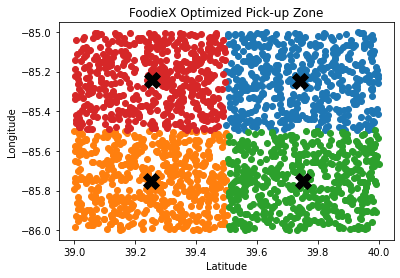

In [33]:
#Visualizaing the clusters
for number in range(0, 4):
    plt.scatter(x = df_new.loc[df_new['cluster_number']==number, 'Latitude'],
                y = df_new.loc[df_new['cluster_number'] == number, 'Longitude'], label = 'Cluster ' + str(number))
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s = 250, c='black', marker = "X", label = 'Centroids')
plt.title('FoodieX Optimized Pick-up Zone')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [34]:
#Actual Latitude and Longitude of centroids 
centroids

array([[ 39.74127327, -85.24830112],
       [ 39.25316086, -85.74962225],
       [ 39.75193775, -85.75092562],
       [ 39.25546683, -85.24261682]])

### Conclusion for Optimized Pickup Zone
According to the above k means clustering method, I find 4 optimized clusters and their corresponding centroids. Therefore, the optimized pickup zone should be the centroids of each cluster and they have latitude and longitude as (39.7517151, -85.75000818), (39.25221476, -85.7495351), (39.73896479, -85.24680684), (39.25398911, -85.24309421)

# 3 Estimating cook time based on restaurant info & Estimating Average Cost based on restaurant info

In [35]:
df_new.corr()

,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,ranking,cluster_number
Latitude,1.000000,0.002166,0.021242,-0.011385,0.026240,0.012146,0.010361,0.006713,0.003748,-0.361384
Longitude,0.002166,1.000000,0.007954,-0.003901,0.005491,-0.013347,-0.013176,-0.043249,0.001606,0.006672
Average_Cost,0.021242,0.007954,1.000000,0.197867,0.266252,0.419111,0.439414,0.226346,-0.473946,0.020040
Minimum_Order,-0.011385,-0.003901,0.197867,1.000000,0.086903,0.146039,0.151519,0.221671,-0.152767,-0.006226
Rating,0.026240,0.005491,0.266252,0.086903,1.000000,0.281026,0.249960,0.244145,-0.644206,-0.030784
Votes,0.012146,-0.013347,0.419111,0.146039,0.281026,1.000000,0.965210,0.230785,-0.614057,-0.009912
Reviews,0.010361,-0.013176,0.439414,0.151519,0.249960,0.965210,1.000000,0.204738,-0.545860,-0.003198
Cook_Time,0.006713,-0.043249,0.226346,0.221671,0.244145,0.230785,0.204738,1.000000,-0.380560,0.009913
ranking,0.003748,0.001606,-0.473946,-0.152767,-0.644206,-0.614057,-0.545860,-0.380560,1.000000,0.016691
cluster_number,-0.361384,0.006672,0.020040,-0.006226,-0.030784,-0.009912,-0.003198,0.009913,0.016691,1.000000


### Conclusion on Correlation Matrix
#### For Cook_Time
1. According to the above correlation matrix, Cook_Time has the strongest correlation with ranking and it is a negative correlation. This makes sense because the ranking is ordered from smallest to largest. Thus, it indicates that the more popular the restaurants are, the more cooking time it will take.  
2. Cook time also has a positive relationship with Rating and Votes.

#### For Average Cost
1. Average Cost also has the strongest relationship with ranking and it is a negative relationship. This indicates that the more popular the restaurant, the higher the average cost. This also makes sense because first of all, according to the "Average cost of Trending restaurants" that I plot in the first section, the average cost is mostly around 30 dollars but also has a large proportion of average cost between 50 dollars to 80 dollars. Intuitively, people love to buy more if they like restaurants. 
2. Average cost also has a positive relationship with votes and reviews. 

#### In general
1. Votes, Reviews, and ranking seem to have the most influences on the cooking time and average cost based on the correlation matric. 

I decide to run a *Decition Tree Classification* which can account for the non-linear relationship and among variables while also taking categorical variables into consideration. The correlation matrix only considers one variable's influence on average cost or cook time but with the decision tree, we are able to see the different combinations' variables influence the average cost and cook time. 

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

In [37]:
df_new = df_new.assign(Cuisines = df_new.Cuisines.str.split(', '))


In [38]:
df_new = df_new.explode("Cuisines")
df_new['Cuisines'] = df_new['Cuisines'].astype('category')

In [40]:
#pd.get_dummies(X) X is the dataframe
#X_train, X_test, y_train, y_test = train_test_split(X, Y_label, test_size=0.20)
df_new2 = pd.get_dummies(df_new)

In [41]:
df_new3 = df_new2.groupby(['Restaurant','Latitude','Longitude', 'Average_Cost','Minimum_Order','Rating','Votes','Reviews','Cook_Time',
 'ranking'])['Cuisines_Afghan','Cuisines_American','Cuisines_Andhra','Cuisines_Arabian','Cuisines_Asian','Cuisines_Assamese',
 'Cuisines_Awadhi','Cuisines_BBQ','Cuisines_Bakery','Cuisines_Bangladeshi','Cuisines_Bar Food','Cuisines_Belgian',
 'Cuisines_Bengali','Cuisines_Beverages','Cuisines_Bihari','Cuisines_Biryani','Cuisines_Bohri','Cuisines_Brazilian',
 'Cuisines_Bubble Tea','Cuisines_Burger','Cuisines_Burmese','Cuisines_Cafe','Cuisines_Cantonese','Cuisines_Charcoal Chicken',
 'Cuisines_Chettinad','Cuisines_Chinese','Cuisines_Coffee','Cuisines_Continental','Cuisines_Desserts','Cuisines_European',
 'Cuisines_Fast Food','Cuisines_Finger Food','Cuisines_French','Cuisines_Frozen Yogurt','Cuisines_German','Cuisines_Goan',
 'Cuisines_Gujarati','Cuisines_Healthy Food','Cuisines_Hyderabadi','Cuisines_Ice Cream','Cuisines_Indonesian','Cuisines_Italian',
 'Cuisines_Japanese','Cuisines_Juices','Cuisines_Kashmiri','Cuisines_Kebab','Cuisines_Kerala','Cuisines_Konkan','Cuisines_Korean',
 'Cuisines_Lebanese','Cuisines_Lucknowi','Cuisines_Maharashtrian','Cuisines_Malaysian','Cuisines_Mangalorean','Cuisines_Mediterranean',
 'Cuisines_Mexican','Cuisines_Mishti','Cuisines_Mithai','Cuisines_Modern Indian','Cuisines_Momos','Cuisines_Mughlai','Cuisines_Naga',
 'Cuisines_North Eastern','Cuisines_North Indian','Cuisines_Odia','Cuisines_Paan','Cuisines_Parsi','Cuisines_Pizza','Cuisines_Poké',
 'Cuisines_Portuguese','Cuisines_Rajasthani','Cuisines_Raw Meats','Cuisines_Roast Chicken','Cuisines_Rolls','Cuisines_Salad',
 'Cuisines_Sandwich','Cuisines_Seafood','Cuisines_South Indian','Cuisines_Spanish','Cuisines_Sri Lankan','Cuisines_Steak',
 'Cuisines_Street Food','Cuisines_Sushi','Cuisines_Tamil','Cuisines_Tea','Cuisines_Thai','Cuisines_Tibetan','Cuisines_Vietnamese',
 'Cuisines_Wraps'].sum()

<ipython-input-41-43c191535729>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new3 = df_new2.groupby(['Restaurant','Latitude','Longitude', 'Average_Cost','Minimum_Order','Rating','Votes','Reviews','Cook_Time',


In [42]:
df_new3 = df_new3.reset_index()

#### Cook Time Estimation

In [43]:
X = df_new3.iloc[:, 1:]
X = X.loc[:, X.columns!='Cook_Time']
Y = df_new3['Cook_Time']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
df_new3

,Restaurant,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time,ranking,...,Cuisines_Sri Lankan,Cuisines_Steak,Cuisines_Street Food,Cuisines_Sushi,Cuisines_Tamil,Cuisines_Tea,Cuisines_Thai,Cuisines_Tibetan,Cuisines_Vietnamese,Cuisines_Wraps
0,ID_1000,39.829351,-85.249351,25.0,50.0,3.7,96,55,30.0,602,...,0,0,0,0,0,0,0,0,0,0
1,ID_1004,39.417004,-85.148521,10.0,50.0,3.0,4,1,30.0,1083,...,0,0,0,0,0,0,0,0,0,0
2,ID_1004,39.704981,-85.426350,5.0,50.0,0.0,0,0,30.0,1094,...,0,0,1,0,0,0,0,0,0,0
3,ID_1005,39.444192,-85.842006,15.0,50.0,4.3,253,118,30.0,235,...,0,0,1,0,0,0,0,0,0,0
4,ID_1007,39.620668,-85.114727,25.0,50.0,0.0,0,0,30.0,1094,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,ID_986,39.063546,-85.028933,20.0,50.0,-1.0,0,0,30.0,1095,...,0,0,0,0,0,0,0,0,0,0
2015,ID_988,39.697670,-85.024031,35.0,50.0,3.9,2768,1369,30.0,97,...,0,0,0,0,0,0,0,0,0,0
2016,ID_989,39.029861,-85.078761,30.0,50.0,4.1,1177,696,45.0,64,...,0,0,0,0,0,0,0,0,0,0
2017,ID_99,39.689777,-85.088266,10.0,50.0,3.8,101,38,30.0,555,...,0,0,1,0,0,0,0,0,0,0


In [44]:
clf = DecisionTreeClassifier(max_depth = 10, criterion = 'entropy', min_samples_leaf = 20)

In [45]:
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test, check_input=True)

In [46]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.7004950495049505


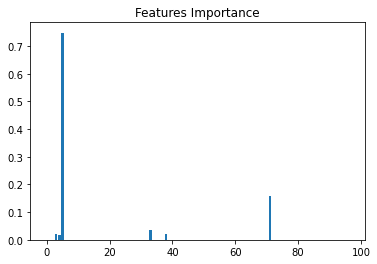

In [55]:
# get importance
importance = clf.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Features Importance")
plt.show()

In [48]:
#Features importance 
sorted(list(zip(list(X), importance)), key = lambda x: x[1], reverse = True)[:11]

[('Votes', 0.5361347725957483),
 ('ranking', 0.14996812715873406),
 ('Longitude', 0.10389007911569152),
 ('Latitude', 0.03804738609148636),
 ('Average_Cost', 0.03205156767395296),
 ('Rating', 0.027216036118487708),
 ('Cuisines_North Indian', 0.023748083963312246),
 ('Minimum_Order', 0.021814937727895365),
 ('Cuisines_Fast Food', 0.02059564754207611),
 ('Reviews', 0.0183178753254971),
 ('Cuisines_Bakery', 0.0163274604610293)]

### Conclusion on Decision Tree of Cook Time Estimation
1. According to the features importance of the decision tree above, votes and ranking are the most important feature that influences the cooking time, then location, longitude, and Latitude are also important. 

2. Cuisines type such as North Indian, Fast Food, and Bakery also have impacts on Cook Time. This finding aligns with the findings that we have in section 1. Since these types of food are mostly among the top 1% trending restaurants, the restaurants are or are not these specific types can have impacts on the cooking time. 

3. In general, Cook time is more related to how popular the restaurants are and less related to the cuisines type of the restaurants. Popular or not of a restaurant is defined by the ranking metric in the first section. 

#### Average Cost Estimation

In [57]:
X_cost = df_new3.iloc[:, 1:]
X_cost = X_cost.loc[:, X_cost.columns!='Average_Cost']
Y_cost = df_new3['Average_Cost']
X_traincost, X_testcost, Y_traincost, Y_testcost = train_test_split(X_cost, Y_cost, test_size=0.20)

In [103]:
clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 50)

In [104]:
clf.fit(X_traincost, Y_traincost)
y_predcost = clf.predict(X_testcost, check_input=True)

In [105]:
print("Accuracy:",metrics.accuracy_score(Y_testcost, y_predcost))

Accuracy: 0.3292079207920792


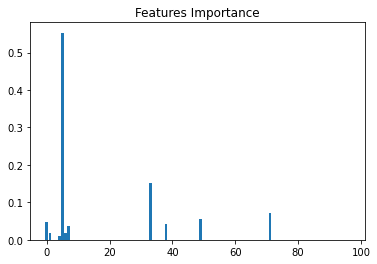

In [106]:
# get importance
importance = clf.feature_importances_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Features Importance")
plt.show()

In [107]:
#Features importance
sorted(list(zip(list(X_cost), importance)), key = lambda x: x[1], reverse = True)[:11]

[('Reviews', 0.5529984194892775),
 ('Cuisines_Chinese', 0.15038704931259314),
 ('Cuisines_North Indian', 0.07103465465189406),
 ('Cuisines_Italian', 0.05500834488205409),
 ('Latitude', 0.04808326823745512),
 ('Cuisines_Fast Food', 0.04256971932086792),
 ('ranking', 0.035967923808458764),
 ('Longitude', 0.018058863942038046),
 ('Cook_Time', 0.01690419533503875),
 ('Votes', 0.008987561020322546),
 ('Minimum_Order', 0.0)]

### Conclusion on Decision Tree of Average Cost Estimation
1. According to the features importance of the decision tree above, Reviews are the most important features that influence the average cost. This is reasonable as more reviews we have, more new customers will be attracted by the photos and comments of restaurants and therefore, buy more food in a restaurant. 
2. Cuisine type is also a significant variable that can influence the average cost of the restaurants. Especially whether the restaurants are Chinese, North Indian, Italian, and fast food or not will have an impact on the average cost. 
3. In general, the average cost is more related to people's comments and types of restaurants and less related to how popular the restaurant is. Popular or not of a restaurant is defined by the ranking metric in the first section. 

# 4 Findings

    1. Among the top 1% trending restaurants in the dataset, Cafe and Dessert type of restaurants occupies a big proportion among the top 1 % restaurants. Moreover, the average cost of these trending Restaurants is most around 30 dollars, 50 dollars, and 80 dollars and their cook time is mostly around 45 minutes. The location of the trending restaurants is pretty scattered in town based on the latitude and longitude. 

    2. Based on the latitude and longitude of the restaurants, I separated the restaurants into 4 optimized clusters. According to these 4 optimized clusters and their corresponding centroids, the optimized pickup zone, Latitude, and Longitude, for FoodieX should be (39.7517151, -85.75000818), (39.25221476, -85.7495351), (39.73896479, -85.24680684), and (39.25398911, -85.24309421).
    
    3. Based on the correlation matrix and features importance of the decision tree, the cooking time of restaurants is more impacted by how popular the restaurant is and less impacted by the cuisines type of the restaurants. Specifically, the higher the votes and ranking, the longer the cooking time. This is reasonable as the more popular restaurants, the more customers they have. 
    
    4. Based on the correlation matric and features importance of decision tree, the average cost of restaurants is more affected by the reviews and cuisine type of the restaurants and less influenced by how popular the restaurant is. Specifically, restaurants are North Indian food, Fast food, and Chinese food or not can cause the average cost to be different among restaurants. 